In [2]:
import networkx as nx
from networkx.readwrite import gexf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
G = gexf.read_gexf('data/outputs/tags-tags.gexf')
print(nx.__version__)
print(nx.info(G))

2.4
Name: 
Type: Graph
Number of nodes: 2585
Number of edges: 8776
Average degree:   6.7899


# EDA on graph

1. Basic info and average degree
2. check if whole network is connected, is it a maximal connected graph 
3. find number of connected components within network 
4. examine cliques, and find maximal cliques
5. explore ego_networks for key nodes 
6. visualise key subgraphs (platforms and games titles)
7. degree distribution 
9. group disturbance 
10. connectivity measures: degree cetrality and betweeness and others


## Basic Info

In [4]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2585
Number of edges: 8776
Average degree:   6.7899


## Is connected

In [5]:
from networkx.algorithms import components
components.is_connected(G)

False

## Connected Components

In [6]:
print(f'Number of connected components in graph: {components.number_connected_components(G)}')

Number of connected components in graph: 54


In [7]:
cc_subgraphs = [[sg, len(sg)] for sg in components.connected_components(G)]

cc_df = pd.DataFrame(cc_subgraphs, columns=['subgraph', 'size'])

In [8]:
cc_df.sort_values('size', ascending=False).head(5)

,subgraph,size
1,"{anno-1602, x3-terran-conflict, rock-band-seri...",2473
23,"{kings-bounty-north, kings-bounty-crossworlds,...",4
28,"{might-and-magic-8-day-of-destroyer, might-and...",3
5,"{battletech, battletech-heavy-metal, battletec...",3
8,"{call-of-duty-2, call-of-duty, call-of-duty-un...",3


## cliques, and maximal cliques

In [9]:
from networkx.algorithms import clique

In [10]:
print(f'Largest maximal clique in the network is of size {clique.graph_clique_number(G)}')

Largest maximal clique in the network is of size 14


In [11]:
c = clique.number_of_cliques(G).items()
cliques_df = pd.DataFrame(c, columns=['Tag', 'max_cliques']).sort_values('max_cliques',ascending=False)

In [12]:
print(cliques_df.head(20))

Tag  max_cliques
12          technical-issues         2103
17                        pc         1962
409                    steam         1622
488                 xbox-360          833
14                       ps3          783
509                    macos          722
534              controllers          692
3               achievements          591
28                  xbox-one          517
23                       ps4          504
51                      mods          433
733                    linux          396
504                windows-7          375
9                    windows          344
508      version-differences          334
50    minecraft-java-edition          331
5                        ios          283
45   backwards-compatibility          277
536              performance          276
16                 emulation          273


minecraft-java-edition is the first game title that appears in the top 20 nodes in cllique participation. 

but what does it mean when tags participate in large number of cliques?

In [13]:
node_name = 'minecraft-java-edition'
minecraft_cliques_df = pd.DataFrame(
    [[node_name, clique_sg, len(clique_sg)] for clique_sg in clique.cliques_containing_node(G, node_name)], 
    columns = ['node_name','clique_sg', 'clique_size']).sort_values('clique_size', ascending=False)

In [14]:
minecraft_cliques_df.head(10)

,node_name,clique_sg,clique_size
136,minecraft-java-edition,"[technical-issues, pc, steam, backwards-compat...",14
138,minecraft-java-edition,"[technical-issues, pc, steam, backwards-compat...",14
173,minecraft-java-edition,"[technical-issues, pc, steam, controllers, xbo...",14
137,minecraft-java-edition,"[technical-issues, pc, steam, backwards-compat...",13
221,minecraft-java-edition,"[technical-issues, pc, audio-hardware, xbox-36...",13
181,minecraft-java-edition,"[technical-issues, pc, steam, controllers, lin...",13
212,minecraft-java-edition,"[technical-issues, pc, mouse, macos, keyboard,...",13
172,minecraft-java-edition,"[technical-issues, pc, steam, controllers, xbo...",13
226,minecraft-java-edition,"[technical-issues, pc, audio-hardware, xbox-36...",13
162,minecraft-java-edition,"[technical-issues, pc, steam, windows, macos, ...",12


In [15]:
print(minecraft_cliques_df.iloc[0].clique_sg)
print(minecraft_cliques_df.iloc[1].clique_sg)

['technical-issues', 'pc', 'steam', 'backwards-compatibility', 'xbox-360', 'xbox-one', 'ps3', 'controllers', 'ps4', 'windows-7', 'monitor', 'minecraft-java-edition', 'hardware', 'macos']
['technical-issues', 'pc', 'steam', 'backwards-compatibility', 'xbox-360', 'xbox-one', 'windows-10', 'windows-7', 'minecraft-java-edition', 'monitor', 'controllers', 'macos', 'hardware', 'ps4']


In [16]:
hist = nx.degree_histogram(G)

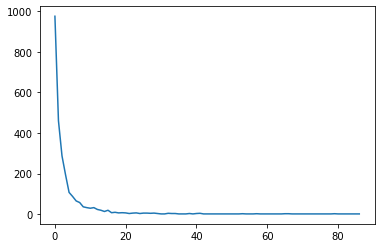

In [17]:
plt.plot(list(filter(lambda x: x > 0 ,hist)))

In [18]:
pd.Series(hist, name='degree_count').describe()

count    559.000000
mean       4.624329
std       48.321970
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      975.000000
Name: degree_count, dtype: float64

# ego_networks on technical-issues and minecraft-java-edition

In [19]:
print('ego network for technical-issues with radius of 1')
print(nx.info(nx.ego_graph(G,'technical-issues',radius=1)))

ego network for technical-issues with radius of 1
Name: 
Type: Graph
Number of nodes: 559
Number of edges: 3799
Average degree:  13.5921


In [20]:
print('ego network for technical-issues with radius of 2')
print(nx.info(nx.ego_graph(G,'technical-issues',radius=2)))

ego network for technical-issues with radius of 2
Name: 
Type: Graph
Number of nodes: 2210
Number of edges: 8375
Average degree:   7.5792


In [21]:
print('ego network for minecraft-java-edition with radius of 1')
print(nx.info(nx.ego_graph(G,'minecraft-java-edition',radius=1)))

ego network for minecraft-java-edition with radius of 1
Name: 
Type: Graph
Number of nodes: 110
Number of edges: 861
Average degree:  15.6545


In [22]:
print('ego network for minecraft-java-edition with radius of 2')
print(nx.info(nx.ego_graph(G,'minecraft-java-edition',radius=2)))

ego network for minecraft-java-edition with radius of 2
Name: 
Type: Graph
Number of nodes: 1996
Number of edges: 7993
Average degree:   8.0090


# visallise maximal clique

In [23]:
cliques = pd.DataFrame([[cc,len(cc)] for cc in clique.find_cliques(G)], columns=['clique_sg', 'clique_size'])

In [24]:
cliques.sort_values('clique_size', ascending=False, inplace=True)

In [25]:
max_cliques_nodes = set()
for i, cc in cliques[1:3].iterrows(): 
    print(cc.clique_sg) 
    for node in cc.clique_sg:
        max_cliques_nodes.add(node)

['technical-issues', 'pc', 'steam', 'controllers', 'xbox-360', 'ps3', 'xbox-one', 'ps4', 'windows-7', 'monitor', 'hardware', 'keyboard', 'macos', 'the-elder-scrolls-5-skyrim']
['technical-issues', 'pc', 'steam', 'backwards-compatibility', 'xbox-360', 'xbox-one', 'windows-10', 'windows-7', 'minecraft-java-edition', 'monitor', 'controllers', 'macos', 'hardware', 'ps4']


In [26]:
max_cliques_nodes
    

{'backwards-compatibility',
 'controllers',
 'hardware',
 'keyboard',
 'macos',
 'minecraft-java-edition',
 'monitor',
 'pc',
 'ps3',
 'ps4',
 'steam',
 'technical-issues',
 'the-elder-scrolls-5-skyrim',
 'windows-10',
 'windows-7',
 'xbox-360',
 'xbox-one'}

In [27]:
max_cliques_sg = G.subgraph(max_cliques_nodes)
print(nx.info(max_cliques_sg))

Name: 
Type: Graph
Number of nodes: 17
Number of edges: 130
Average degree:  15.2941


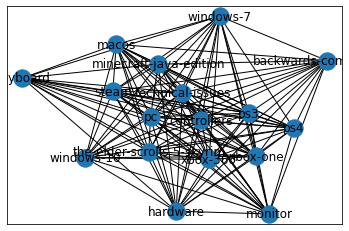

In [28]:
nx.draw_networkx(max_cliques_sg)